# Treinamento Customizado | YOLO



In [3]:
pip install ultralytics


In [ ]:
from ultralytics import YOLO

# Definindo e baixando modelo
model = YOLO("yolov8n.pt")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 99.9MB/s]


In [5]:
import os
import random
import shutil

# Definir caminhos
image_dir = "Images"
label_dir = "Annotations"

train_img_dir = "dataset/images/train"
val_img_dir = "dataset/images/val"
train_label_dir = "dataset/labels/train"
val_label_dir = "dataset/labels/val"

# Criar diretórios caso não existam
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Listar todas as imagens
all_images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Embaralhar e dividir em 80% treino, 20% validação
random.shuffle(all_images)
train_size = int(0.8 * len(all_images))
train_images = all_images[:train_size]
val_images = all_images[train_size:]

# Função para mover imagens e labels
def move_files(image_list, dest_img_dir, dest_label_dir):
    for img_file in image_list:
        img_path = os.path.join(image_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(label_dir, label_file)

        # Mover imagem
        shutil.move(img_path, os.path.join(dest_img_dir, img_file))

        # Mover label se existir
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(dest_label_dir, label_file))

# Aplicar separação
move_files(train_images, train_img_dir, train_label_dir)
move_files(val_images, val_img_dir, val_label_dir)

print("Divisão concluída! 🚀")


Divisão concluída! 🚀


Redimensionando Imagens

In [6]:
import cv2
import os
import numpy as np

def resize_images(directory, size=(640, 640)):
    for file in os.listdir(directory):
        if file.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(directory, file)
            img = cv2.imread(img_path)

            # Redimensionar sem distorcer
            h, w = img.shape[:2]
            scale = min(size[0] / w, size[1] / h)
            new_w, new_h = int(w * scale), int(h * scale)

            resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

            # Criar um fundo preto e colocar a imagem redimensionada no centro
            final_img = 255 * np.ones((size[1], size[0], 3), dtype=np.uint8)
            x_offset = (size[0] - new_w) // 2
            y_offset = (size[1] - new_h) // 2
            final_img[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

            # Salvar a imagem redimensionada
            cv2.imwrite(img_path, final_img)

# Redimensionar imagens de treino e validação
resize_images("dataset/images/train")
resize_images("dataset/images/val")

print("Imagens redimensionadas com sucesso! ✅")


Imagens redimensionadas com sucesso! ✅


In [9]:
# Treinar o modelo
model.train(data="dataset/data.yaml", epochs=50, imgsz=640, batch=16)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/labels/train... 77 images, 0 backgrounds, 5 corrupt: 100%|██████████| 77/77 [00:00<00:00, 753.11it/s]

train: WARNING ⚠️ /content/dataset/images/train/49.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0224]
train: WARNING ⚠️ /content/dataset/images/train/73.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0222]
train: WARNING ⚠️ /content/dataset/images/train/78.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0184]
train: WARNING ⚠️ /content/dataset/images/train/90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0264]
train: WARNING ⚠️ /content/dataset/images/train/95.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0016]
train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/labels/val... 20 images, 0 backgrounds, 5 corrupt: 100%|██████████| 20/20 [00:00<00:00, 1367.49it/s]

val: WARNING ⚠️ /content/dataset/images/val/10.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0067]
val: WARNING ⚠️ /content/dataset/images/val/11.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0025]
val: WARNING ⚠️ /content/dataset/images/val/55.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0508]
val: WARNING ⚠️ /content/dataset/images/val/64.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.006]
val: WARNING ⚠️ /content/dataset/images/val/97.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0014]
val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.625      3.958      2.104         22        640: 100%|██████████| 5/5 [01:19<00:00, 15.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]

                   all         15         15    0.00663      0.969     0.0918     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G       1.57      3.891      2.049         30        640: 100%|██████████| 5/5 [01:08<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.27s/it]

                   all         15         15    0.00552      0.969       0.12     0.0825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.301      3.754      1.826         27        640: 100%|██████████| 5/5 [01:07<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.79s/it]

                   all         15         15    0.00522      0.969      0.165      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       1.43      3.748      1.857         23        640: 100%|██████████| 5/5 [01:02<00:00, 12.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all         15         15    0.00567      0.969       0.14     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.258      3.581      1.708         28        640: 100%|██████████| 5/5 [01:04<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.95s/it]

                   all         15         15    0.00698      0.969      0.155     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.312      3.621      1.741         26        640: 100%|██████████| 5/5 [01:06<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]

                   all         15         15    0.00794      0.969      0.185     0.0941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.354      3.466      1.742         24        640: 100%|██████████| 5/5 [01:06<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.06s/it]

                   all         15         15    0.00981          1      0.303      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.378      3.456      1.732         25        640: 100%|██████████| 5/5 [01:05<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]

                   all         15         15     0.0103          1      0.278      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.233      3.371      1.661         22        640: 100%|██████████| 5/5 [01:22<00:00, 16.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]

                   all         15         15     0.0105          1      0.242      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G       1.27      3.267      1.706         25        640: 100%|██████████| 5/5 [01:08<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]

                   all         15         15     0.0118          1       0.28       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.166      3.135       1.63         22        640: 100%|██████████| 5/5 [01:12<00:00, 14.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]

                   all         15         15     0.0117          1      0.263      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.223      2.989      1.686         20        640: 100%|██████████| 5/5 [01:06<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]

                   all         15         15      0.956     0.0595      0.216      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.238      2.953      1.659         27        640: 100%|██████████| 5/5 [01:07<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.61s/it]

                   all         15         15       0.95     0.0625      0.228      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.212      3.032      1.716         23        640: 100%|██████████| 5/5 [01:06<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]

                   all         15         15      0.968      0.091       0.26      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.192      2.739      1.635         32        640: 100%|██████████| 5/5 [01:06<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]

                   all         15         15      0.934     0.0938      0.287      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.306      2.836      1.695         37        640: 100%|██████████| 5/5 [01:09<00:00, 13.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.55s/it]

                   all         15         15      0.981     0.0938      0.246      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.187      2.754      1.655         18        640: 100%|██████████| 5/5 [01:06<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.19s/it]

                   all         15         15      0.552      0.156      0.262       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.145      2.773      1.604         27        640: 100%|██████████| 5/5 [01:06<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         15         15      0.491      0.333      0.283      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.171      2.715      1.594         28        640: 100%|██████████| 5/5 [01:11<00:00, 14.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all         15         15      0.541      0.323       0.22     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.174      2.661      1.603         23        640: 100%|██████████| 5/5 [01:08<00:00, 13.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]

                   all         15         15      0.652      0.188      0.383      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.084       2.56      1.528         25        640: 100%|██████████| 5/5 [01:06<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.23s/it]

                   all         15         15      0.661      0.249      0.305      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.188      2.662      1.582         26        640: 100%|██████████| 5/5 [01:05<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         15         15      0.556      0.292      0.342      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.124      2.532      1.566         21        640: 100%|██████████| 5/5 [01:07<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]

                   all         15         15      0.546      0.396      0.396      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.109      2.438      1.588         22        640: 100%|██████████| 5/5 [01:07<00:00, 13.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         15         15      0.324       0.49      0.448      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.077      2.398      1.499         23        640: 100%|██████████| 5/5 [01:10<00:00, 14.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         15         15      0.516       0.49      0.424       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G       1.02      2.371      1.457         23        640: 100%|██████████| 5/5 [01:07<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         15         15      0.524       0.49      0.419      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.127      2.299      1.569         25        640: 100%|██████████| 5/5 [01:10<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.05s/it]

                   all         15         15      0.489       0.49      0.402      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G       1.11      2.198      1.498         28        640: 100%|██████████| 5/5 [01:07<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         15         15       0.55      0.629       0.53      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.158      2.283      1.539         26        640: 100%|██████████| 5/5 [01:09<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         15         15      0.524      0.583      0.508      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.114       2.22      1.562         22        640: 100%|██████████| 5/5 [01:08<00:00, 13.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]

                   all         15         15       0.34      0.597      0.472      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.076      2.357        1.5         16        640: 100%|██████████| 5/5 [01:10<00:00, 14.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.27s/it]

                   all         15         15      0.492      0.486      0.428      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.109      2.255      1.538         23        640: 100%|██████████| 5/5 [01:14<00:00, 14.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

                   all         15         15      0.529      0.359      0.424      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.069      2.212      1.509         32        640: 100%|██████████| 5/5 [01:08<00:00, 13.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.03s/it]

                   all         15         15      0.483      0.351      0.417      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.029      2.026      1.444         30        640: 100%|██████████| 5/5 [01:10<00:00, 14.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all         15         15      0.461      0.377        0.4      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.061      2.106       1.51         23        640: 100%|██████████| 5/5 [01:08<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.00s/it]

                   all         15         15      0.467      0.375      0.395      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.9457      2.013      1.429         28        640: 100%|██████████| 5/5 [01:07<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.11s/it]

                   all         15         15      0.422      0.535      0.419      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.8918       1.91      1.369         28        640: 100%|██████████| 5/5 [01:08<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]

                   all         15         15      0.429      0.515      0.433       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.9272      1.995       1.41         22        640: 100%|██████████| 5/5 [01:08<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]

                   all         15         15      0.456      0.536      0.439      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.044      2.068      1.516         26        640: 100%|██████████| 5/5 [01:08<00:00, 13.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]

                   all         15         15       0.29      0.542      0.442      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9344      1.984      1.347         28        640: 100%|██████████| 5/5 [01:08<00:00, 13.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all         15         15      0.419      0.455      0.433      0.247


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.8281      2.536      1.543          8        640: 100%|██████████| 5/5 [01:07<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.65s/it]

                   all         15         15      0.431      0.487      0.446       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.7953      2.469      1.474          9        640: 100%|██████████| 5/5 [01:05<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.50s/it]

                   all         15         15      0.282      0.461      0.421      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.6679      2.257      1.354         10        640: 100%|██████████| 5/5 [01:05<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         15         15      0.231       0.49      0.425      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.8016      2.317      1.429         15        640: 100%|██████████| 5/5 [01:07<00:00, 13.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]

                   all         15         15      0.277      0.533      0.426      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.6719      2.182      1.341          9        640: 100%|██████████| 5/5 [01:09<00:00, 13.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]

                   all         15         15        0.4      0.552      0.424      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.6537      2.272       1.31          8        640: 100%|██████████| 5/5 [01:06<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.60s/it]

                   all         15         15      0.437      0.522       0.43      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.6573      2.161      1.334          8        640: 100%|██████████| 5/5 [01:07<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.18s/it]

                   all         15         15      0.427      0.552      0.416      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.6901       2.14      1.386         10        640: 100%|██████████| 5/5 [01:08<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

                   all         15         15      0.424      0.512      0.414      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.6699      2.098      1.343         10        640: 100%|██████████| 5/5 [01:06<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.71s/it]

                   all         15         15      0.419       0.51      0.416      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5334       2.07      1.285          9        640: 100%|██████████| 5/5 [01:05<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.59s/it]

                   all         15         15      0.423       0.51      0.414      0.283



50 epochs completed in 1.026 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.24s/it]


                   all         15         15        0.4      0.552      0.424      0.291
                    2A          1          1      0.583          1      0.995      0.895
                    2C          1          1      0.449          1      0.497      0.398
                    3A          2          2          0          0      0.167     0.0831
                    3B          2          2          0          0      0.133     0.0598
                    3C          3          3      0.489      0.667      0.533      0.291
                    4A          1          1          1          0     0.0553     0.0229
                    4B          1          1      0.245          1      0.249      0.149
                    4C          4          4      0.431       0.75       0.76       0.43
Speed: 2.2ms preprocess, 266.1ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78259a830650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,


image 1/1 /content/eu.jpg: 640x480 1 3C, 575.2ms
Speed: 34.4ms preprocess, 575.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)


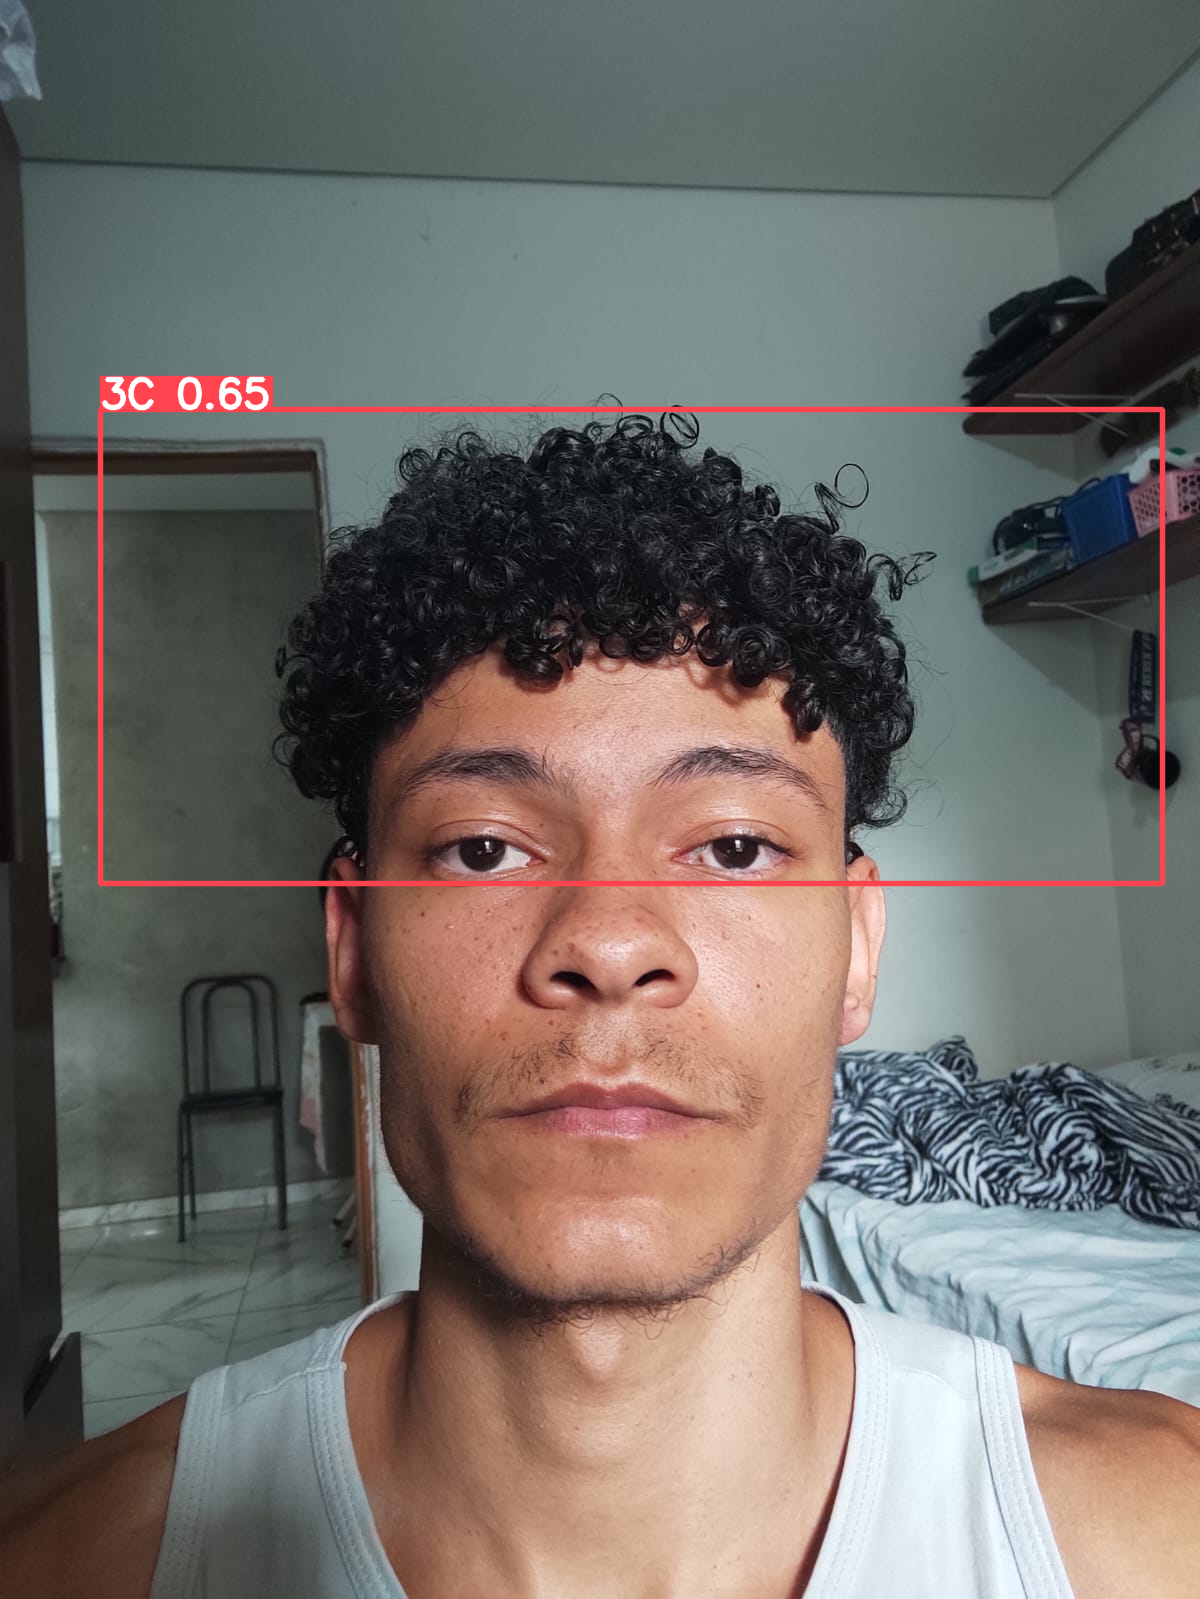

In [12]:
results = model("eu.jpg", imgsz=640, conf=0.2, iou=0.4)
results[0].show()


# Data Augmentation